In [11]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/fish_transformed.csv')
# Separating features and target
X = data.drop('Fish Toxicity', axis=1)
y = data['Fish Toxicity']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, r2

# Training and evaluating Linear Regression
linear_mse, linear_rmse, linear_r2 = train_evaluate_model(linear_model, X_train, y_train, X_test, y_test)

# Training and evaluating Ridge Regression
ridge_mse, ridge_rmse, ridge_r2 = train_evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

# Training and evaluating Random Forest Regression
rf_mse, rf_rmse, rf_r2 = train_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Print the results
print("Linear Regression: MSE =", linear_mse, ", RMSE =", linear_rmse, ", R^2 =", linear_r2)
print("Ridge Regression: MSE =", ridge_mse, ", RMSE =", ridge_rmse, ", R^2 =", ridge_r2)
print("Random Forest Regression: MSE =", rf_mse, ", RMSE =", rf_rmse, ", R^2 =", rf_r2)


Linear Regression: MSE = 1.0463821653353844 , RMSE = 1.0229282307842444 , R^2 = 0.5675170258323361
Ridge Regression: MSE = 1.0463854210971713 , RMSE = 1.0229298221760725 , R^2 = 0.56751568018484
Random Forest Regression: MSE = 1.0331873061963945 , RMSE = 1.0164582166505391 , R^2 = 0.572970627884436


## Interpretation:
### The Random Forest Regression model shows the best performance among the three, with the lowest MSE and RMSE, and the highest R-squared value. This indicates it's better at capturing the complexity and non-linear relationships in the data.
### Both the Linear Regression and Ridge Regression models have similar performance metrics, with relatively higher MSE and RMSE, and lower R-squared values compared to the Random Forest model. This could suggest that the relationship between the predictors and the target variable has non-linear aspects that these linear models are not fully capturing.
### The R-squared values for all models are moderate, indicating that while the models have some predictive power, there's still room for improvement. Feature engineering, model tuning, or trying different modeling approaches might help to increase the predictive performance.

In [4]:
coefficients = linear_model.coef_
feature_names = X.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)


In [6]:
coeff_df

,Feature,Coefficient
1,SM1_Dz(Z),0.559344
5,MLOGP,0.535917
0,CIC0,0.332707
2,GATS1i,-0.296895
3,NdssC,0.240849
4,NdsCH,0.041401


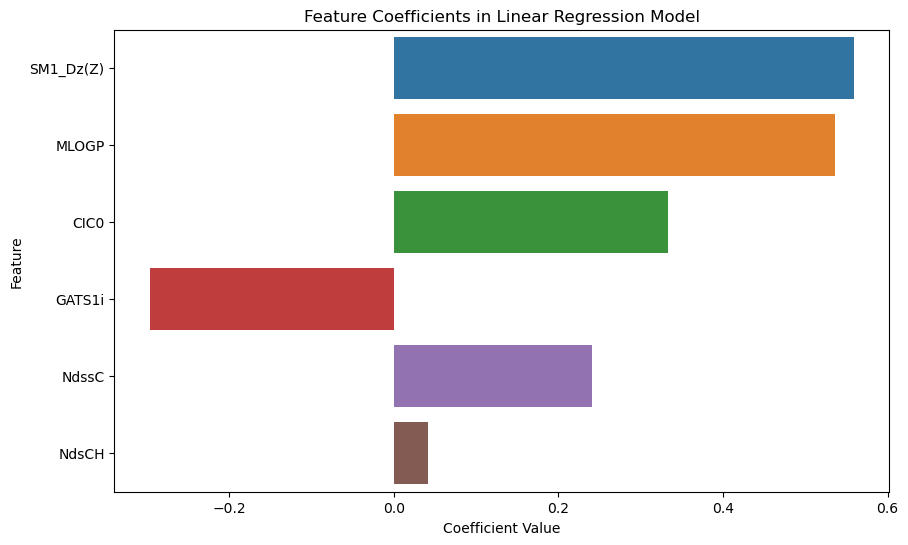

In [12]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

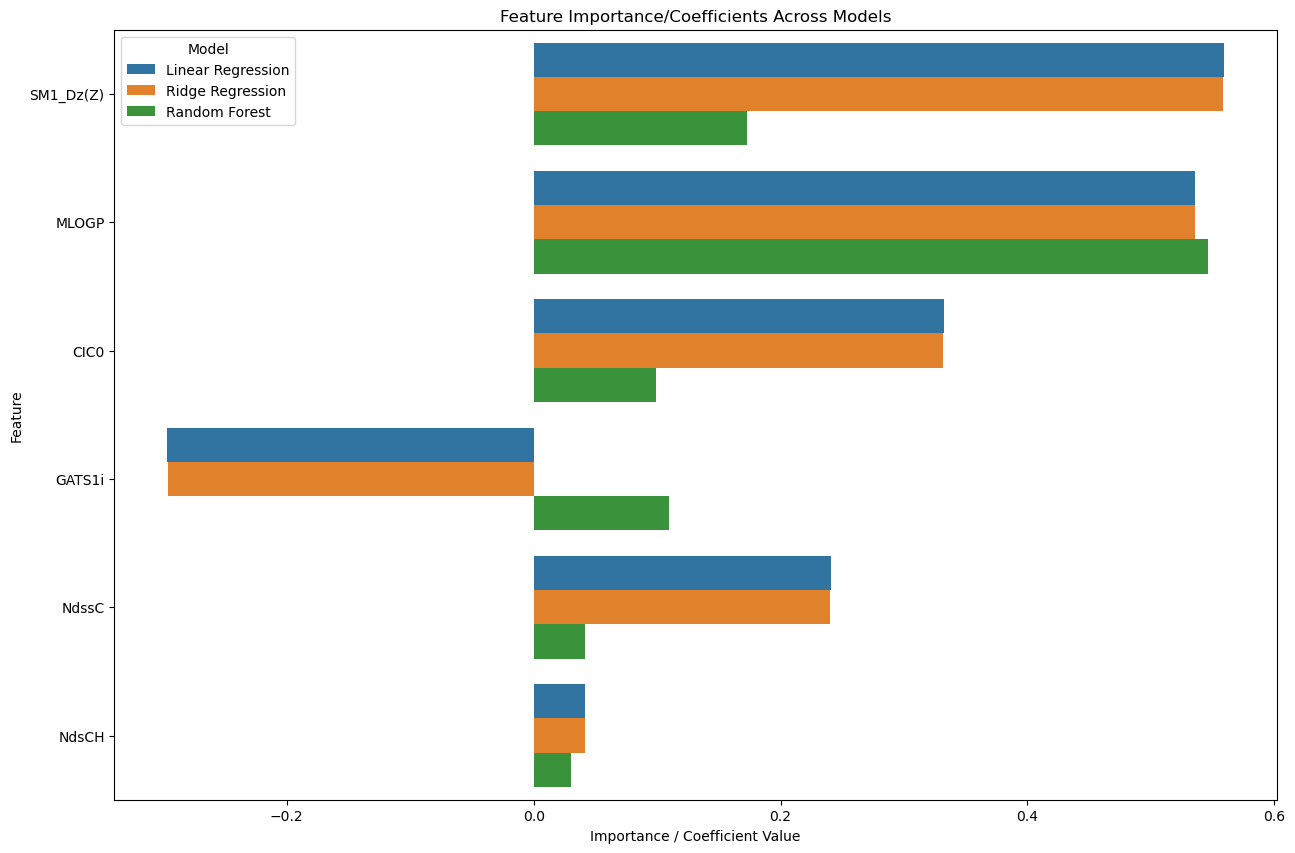

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a DataFrame of feature importance or coefficients
def create_feature_df(model, feature_names, model_name):
    if model_name == 'Random Forest':
        importance = model.feature_importances_
    else: # Linear or Ridge Regression
        importance = model.coef_

    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_df = feature_df.reindex(feature_df.Importance.abs().sort_values(ascending=False).index)
    feature_df['Model'] = model_name
    return feature_df

# Creating dataframes
linear_df = create_feature_df(linear_model, feature_names, 'Linear Regression')
ridge_df = create_feature_df(ridge_model, feature_names, 'Ridge Regression')
rf_df = create_feature_df(random_forest_model, feature_names, 'Random Forest')

# Concatenating dataframes
all_models_df = pd.concat([linear_df, ridge_df, rf_df])

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=all_models_df)
plt.title('Feature Importance/Coefficients Across Models')
plt.xlabel('Importance / Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [15]:
ridge_df

,Feature,Importance,Model
1,SM1_Dz(Z),0.558348,Ridge Regression
5,MLOGP,0.535861,Ridge Regression
0,CIC0,0.331916,Ridge Regression
2,GATS1i,-0.296571,Ridge Regression
3,NdssC,0.240375,Ridge Regression
4,NdsCH,0.041720,Ridge Regression


In [16]:
rf_df

,Feature,Importance,Model
5,MLOGP,0.546298,Random Forest
1,SM1_Dz(Z),0.172628,Random Forest
2,GATS1i,0.110008,Random Forest
0,CIC0,0.099497,Random Forest
3,NdssC,0.041641,Random Forest
4,NdsCH,0.029926,Random Forest


In [14]:
linear_df

,Feature,Importance,Model
1,SM1_Dz(Z),0.559344,Linear Regression
5,MLOGP,0.535917,Linear Regression
0,CIC0,0.332707,Linear Regression
2,GATS1i,-0.296895,Linear Regression
3,NdssC,0.240849,Linear Regression
4,NdsCH,0.041401,Linear Regression
